In [1]:
from common.CommonFunctions import *
import common.KeywordFunctions as kwf

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer


In [2]:
# Reading the data (note the local data folder - placed manually!!)
data = pd.read_csv('./data/train.csv')

# Apply above function to get a list of name lists
list_of_name_list = data[data.Keywords.notna()]["Keywords"].map(kwf.extract_names, na_action=None).tolist()


In [3]:
# Reading features (from common local datafolder)
data = pd.read_csv('./exported_features/all_features.csv')
features_df = data.drop('id', axis=1).drop('revenue', axis=1)
target = data.revenue
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)


In [4]:
data = pd.read_csv('./data/train.csv')
flo_genre = pd.read_csv('./exported_features/flo_genre_feature.csv').drop('Unnamed: 0', axis=1)
flo_age = pd.read_csv('./exported_features/flo_age_feature.csv').drop('Unnamed: 0', axis=1)
marcel_keywords = pd.read_csv('./exported_features/marcel_features.csv').drop('Unnamed: 0', axis=1)

data['popularity'] = np.log1p(data.popularity)
data = data.merge(flo_genre, on=['id'], how='left').merge(marcel_keywords, on=['id'], how='left').merge(flo_age, on=['id'], how='left')

data.runtime = data.runtime.fillna(np.mean(data.runtime))

features = list(flo_genre.columns) + ['popularity', 'budget', 'has_top_keyword', 'runtime']
features.remove('id')

features_df = data[features]
target = data.revenue

X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, np.log1p(y_train))
y_pred = np.exp(reg.predict(X_test)) - 1
np.sqrt(mean_squared_log_error(y_test, y_pred))

2.289375344637496

<module 'matplotlib.pyplot' from '/usr/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

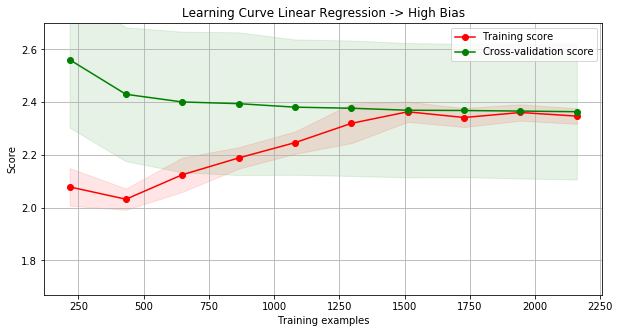

In [5]:
plot_learning_curve(reg, 'Learning Curve Linear Regression -> High Bias', X_train, np.log1p(y_train), scorer=make_scorer(my_score), cv=10, train_sizes=np.linspace(.1, 1.0, 10), ylim=(1.67, 2.7))